1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

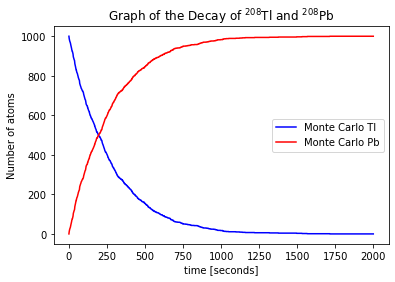

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import random

#initial conditions
t_half_tl   = 3.052*60  #t_half = tau*ln(2) --> tau = t_half / ln(2)
N0           = 1000
t1           = 2000
n_timepoints = 2000

def decay(N0, t1, n_timepoints):
    dt             = t1 / n_timepoints #Calculating the interval between each time division
    count_tl   = np.zeros((n_timepoints)) #creating zero arrays to put the counts into
    count_pb = np.zeros((n_timepoints))
    atoms          = np.ones((N0)) #Creating an array of numbers to represent the atoms in the simulation
    p_decay_tl    = 1 - np.exp(-dt / t_half_tl * np.log(2)) #Calculating the decay probabilities in the time interval
    for idx_time in range(n_timepoints):

        count_tl[idx_time]   = (atoms == 1).sum() #Counting how many atoms of each type remain in the interval
        count_pb[idx_time] = (atoms == 2).sum()
        
        for idx_atom in range(N0):
            
            if atoms[idx_atom] == 1: #Deciding whether the given atom should decay
                if random.random() <= p_decay_tl:
                    atoms[idx_atom] = 2 #add to count_pb
                else:
                    atoms[idx_atom] = 1 #add to count_tl              
    return count_tl, count_pb

timebase = np.arange(0, t1, t1/n_timepoints) #creating the array of times for use in the analytic solution and scipy
n_tl, n_pb = decay(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   

plt.figure()
plt.plot(timebase, n_tl, label = 'Monte Carlo Tl', color = 'blue')
plt.plot(timebase, n_pb, label = 'Monte Carlo Pb', color = 'red')
plt.title('Graph of the Decay of $^{208}$Tl and $^{208}$Pb')
plt.ylabel('Number of atoms')
plt.xlabel('time [seconds]')
plt.legend() 
plt.show()

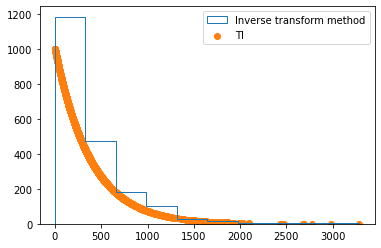

In [2]:
def inverse_transform_method(x):
    return -t_half_tl/np.log(2)*np.log2(1-x) 

u = np.random.random(n_timepoints)
v = inverse_transform_method(u)
plt.hist(v, histtype='step', label='Inverse transform method')
plt.scatter(v,(1-u)*N0, label='Tl')
plt.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

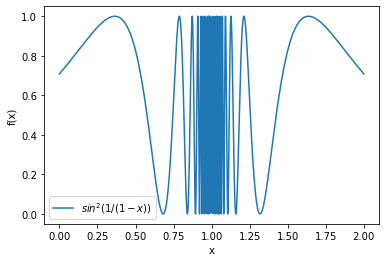

In [3]:
def function(x):
    return (np.sin(1./(1.-x)))**2.

x = np.arange(0,2,0.0003)

plt.plot(x, function(x), label='$sin^2(1/(1-x))$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [4]:
n=10000

x = np.random.random(n)*2.
y = np.random.random(n)
integral_hit_miss = 2.*np.sum(function(x) > y)/n
print('The Hit & Miss estimate of the integral of f(x) on 0 < x < 2 is:', integral_hit_miss)

The Hit & Miss estimate of the integral of f(x) on 0 < x < 2 is: 1.3396


In [5]:
n = 10000
integral = np.zeros((n))

for j in range(n):
    x = np.random.random(n)*2.
    y = np.random.random(n)
    integral[j] = 2.*np.sum(function(x) > y)/n
    
print('The mean value of the Hit & Miss method is: ', np.mean(integral))
print('The std value of the Hit & Miss method is: ', np.std(integral))

The mean value of the Hit & Miss method is:  1.3470483
The std value of the Hit & Miss method is:  0.009392100889045006


In [6]:
def mean_value_method(x, a, b, N):
    return (b-a)/N*np.sum(function(x))

print('The Mean Value Method integral is:', mean_value_method(x, 0., 2., n))
print('The error is:', 2.*np.sqrt(np.var(function(x)))/np.sqrt(n))

The Mean Value Method integral is: 1.3482022353913745
The error is: 0.006541726115336433


In [7]:
print("The error with the mean value method is smaller")

The error with the mean value method is smaller


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [8]:
def area(x):
    return np.sum(x**2., axis=1) <= 1

def mc_integrate(func, a, b, dim, n = 1000):
    
    x_list = np.random.uniform(a, b, (n, dim))
    y = func(x_list)
    
    y_mean =  y.sum()/len(y)
    domain = np.power(b-a, dim)
    
    integ = domain * y_mean
    
    return integ

x = np.random.uniform(-1.,1., (1000, 10))

#print('Integral circle:', area(x))
print('Integral 2D circle:', mc_integrate(area,-1.,1.,2))
print('Integral 10D sphere:', mc_integrate(area,-1.,1.,10))

Integral 2D circle: 3.12
Integral 10D sphere: 5.12


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [9]:
from scipy.integrate import simps

def f(x):
    return x**(-1./2.)/(np.exp(x)+1.)

def w(x):
    return 1./np.sqrt(x)

n=100000
x = np.random.random(n)
y = w(x)
w_int = np.sum(w(x))/n

def I(x, N):
    return np.sum(f(x)/w(x))*w_int/N

print(I(x,n))

0.7547759045955329
